In [2]:
from train_model import *

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
model_levels = [
    np.array(['env_1_sat_59','env_1_sat_59','env_1_sat_59','env_1_sat_25_59_115','env_1_sat_25_59_115','env_1_sat_25_59_115','env_1_5_sat_25_59_115','env_1_5_sat_25_59_115','env_1_5_sat_25_59_115']),
    np.array(['env','sat','env_sat','env','sat','env_sat','env','sat','env_sat'])
]

In [5]:
models = {
    '1_env_1': '0702_env_1',
    '1_sat_59': '0702_sat_59',
    '1_env_1_sat_25': '0703_env_1_sat_59',
    
    '2_env_1': '0702_env_1',
    '2_sat_25_59_115': '0702_sat_25_59_115',
    '2_env_1_sat_25_59_115': '0701_env_1_sat_25_59_115_v2',
    
    '3_env_1_5': '0702_env_1_5',
    '3_sat_25_59_115': '0702_sat_25_59_115',
    '3_env_1_5_sat_25_59_115': '0701_env_1_5_sat_25_59_115'
}

In [6]:
checkpoint =  'best_val_auc' # 'last' #
auc_df = pd.concat([
    pd.read_csv(f"models/{v}/{checkpoint}_species_auc.csv").rename(columns={"auc": k}).set_index(['species','n_occ']) for k, v in models.items()
], axis=1)

auc_df

,,1_env_1,1_sat_59,1_env_1_sat_25,2_env_1,2_sat_25_59_115,2_env_1_sat_25_59_115,3_env_1_5,3_sat_25_59_115,3_env_1_5_sat_25_59_115
species,n_occ,,,,,,,,,
1,2261,0.716835,0.913472,0.848689,0.716835,0.891325,0.831428,0.797265,0.891325,0.890697
5,4529,0.498778,0.655836,0.541083,0.498778,0.635247,0.545961,0.594010,0.635247,0.507216
10,2162,0.926167,0.926382,0.924499,0.926167,0.943092,0.933674,0.927405,0.943092,0.920086
11,4508,0.736671,0.748851,0.766632,0.736671,0.664610,0.677221,0.670595,0.664610,0.776163
24,4539,0.817955,0.678448,0.825425,0.817955,0.656777,0.817655,0.820358,0.656777,0.835771
...,...,...,...,...,...,...,...,...,...,...
10028,204,0.918852,0.971666,0.926833,0.918852,0.927236,0.962206,0.989375,0.927236,0.964716
10031,20,0.037515,0.887858,0.719242,0.037515,0.961409,0.707274,0.508135,0.961409,0.686702
10035,110,0.478691,0.429450,0.493743,0.478691,0.494872,0.476396,0.380688,0.494872,0.508151


In [7]:
auc_df.median()

1_env_1                    0.875068
1_sat_59                   0.816157
1_env_1_sat_25             0.886496
2_env_1                    0.875068
2_sat_25_59_115            0.821303
2_env_1_sat_25_59_115      0.890766
3_env_1_5                  0.873842
3_sat_25_59_115            0.821303
3_env_1_5_sat_25_59_115    0.885400
dtype: float64

In [8]:
auc_df.columns = model_levels
auc_df

env_1_sat_59                     env_1_sat_25_59_115            \
                       env       sat   env_sat                 env       sat   
species n_occ                                                                  
1       2261      0.716835  0.913472  0.848689            0.716835  0.891325   
5       4529      0.498778  0.655836  0.541083            0.498778  0.635247   
10      2162      0.926167  0.926382  0.924499            0.926167  0.943092   
11      4508      0.736671  0.748851  0.766632            0.736671  0.664610   
24      4539      0.817955  0.678448  0.825425            0.817955  0.656777   
...                    ...       ...       ...                 ...       ...   
10028   204       0.918852  0.971666  0.926833            0.918852  0.927236   
10031   20        0.037515  0.887858  0.719242            0.037515  0.961409   
10035   110       0.478691  0.429450  0.493743            0.478691  0.494872   
10038   10        0.980100  0.820627  0.992605            0.980100  0.898346   
10039   2944      0.721724  0.743044  0.773546            0.721724  0.745969   

                        env_1_5_sat_25_59_115                      
                env_sat                   env       sat   env_sat  
species n_occ                                                      
1       2261   0.831428              0.797265  0.891325  0.890697  
5       4529   0.545961              0.594010  0.635247  0.507216  
10      2162   0.933674              0.927405  0.943092  0.920086  
11      4508   0.677221              0.670595  0.664610  0.776163  
24      4539   0.817655              0.820358  0.656777  0.835771  
...                 ...                   ...       ...       ...  
10028   204    0.962206              0.989375  0.927236  0.964716  
10031   20     0.707274              0.508135  0.961409  0.686702  
10035   110    0.476396              0.380688  0.494872  0.508151  
10038   10     0.996773              0.964771  0.898346  0.974049  
10039   2944   0.756856              0.739983  0.745969  0.752293  

[2174 rows x 9 columns]

In [9]:
median_auc = auc_df.median().reset_index().rename(columns={'level_0':'model','level_1':'modality',0:'median_AUC'})
median_auc

,model,modality,median_AUC
0,env_1_sat_59,env,0.875068
1,env_1_sat_59,sat,0.816157
2,env_1_sat_59,env_sat,0.886496
3,env_1_sat_25_59_115,env,0.875068
4,env_1_sat_25_59_115,sat,0.821303
5,env_1_sat_25_59_115,env_sat,0.890766
6,env_1_5_sat_25_59_115,env,0.873842
7,env_1_5_sat_25_59_115,sat,0.821303
8,env_1_5_sat_25_59_115,env_sat,0.885400


<AxesSubplot: xlabel='model', ylabel='median_AUC'>

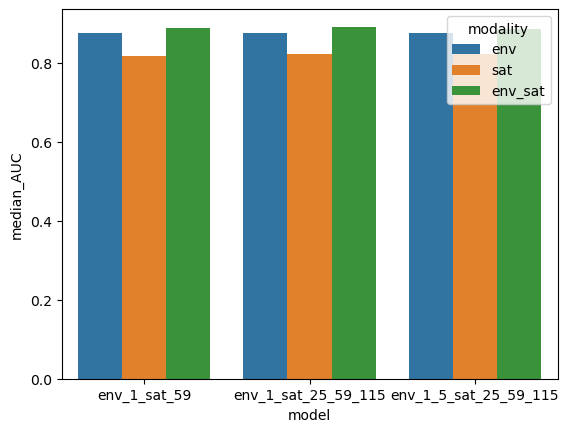

In [10]:
sns.barplot(median_auc, x='model', y='median_AUC', hue='modality')

In [11]:
melt_df = pd.melt(auc_df.reset_index(), id_vars=['species','n_occ'], var_name=['model','modality'], value_name='AUC')
melt_df['AUC'] = melt_df['AUC'].round(3) * 100
melt_df

,species,n_occ,model,modality,AUC
0,1,2261,env_1_sat_59,env,71.7
1,5,4529,env_1_sat_59,env,49.9
2,10,2162,env_1_sat_59,env,92.6
3,11,4508,env_1_sat_59,env,73.7
4,24,4539,env_1_sat_59,env,81.8
...,...,...,...,...,...
19561,10028,204,env_1_5_sat_25_59_115,env_sat,96.5
19562,10031,20,env_1_5_sat_25_59_115,env_sat,68.7
19563,10035,110,env_1_5_sat_25_59_115,env_sat,50.8
19564,10038,10,env_1_5_sat_25_59_115,env_sat,97.4


[(60.0, 95.0)]

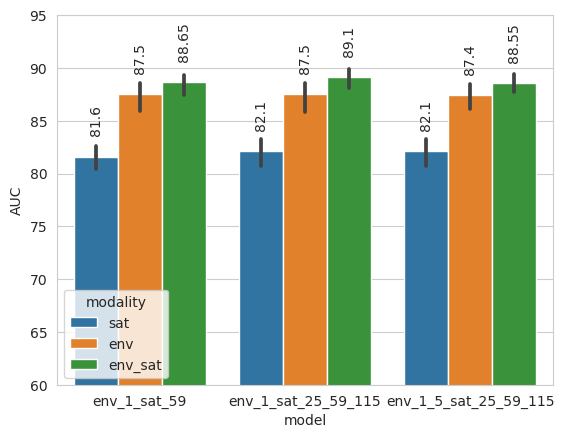

In [19]:
sns.set_style('whitegrid')
ax = sns.barplot(melt_df, x='model', y='AUC', hue='modality', hue_order=['sat','env','env_sat'], estimator='median')

ax.bar_label(ax.containers[0], fontsize=10, padding=15, rotation=90)
ax.bar_label(ax.containers[1], fontsize=10, padding=15, rotation=90)
ax.bar_label(ax.containers[2], fontsize=10, padding=15, rotation=90)
ax.set(ylim=(60,95))
# ax.legend([],[], frameon=False)

In [71]:
median_auc

,model,modality,median_AUC
0,env_1_sat_59,env,0.875068
1,env_1_sat_59,sat,0.816157
2,env_1_sat_59,env_sat,0.894873
3,env_1_sat_25_59_115,env,0.875068
4,env_1_sat_25_59_115,sat,0.821303
5,env_1_sat_25_59_115,env_sat,0.890766
6,env_1_5_sat_25_59_115,env,0.873842
7,env_1_5_sat_25_59_115,sat,0.821303
8,env_1_5_sat_25_59_115,env_sat,0.885400


<AxesSubplot: xlabel='model', ylabel='AUC'>

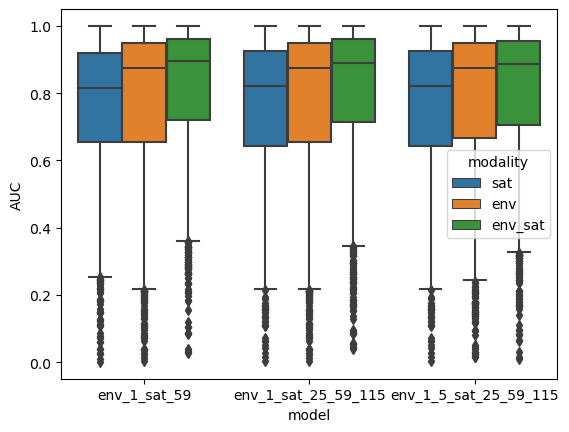

In [43]:
sns.boxplot(melt_df, x='model', y='AUC', hue='modality', hue_order=['sat','env','env_sat'])